/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

{'max_depth': 7, 'max_features': 3, 'n_estimators': 23, 'random_state': 5}
best_score: 0.8654708520179372


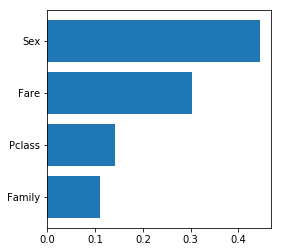

In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


#Embarkedの補完
train["Embarked"] = train["Embarked"].fillna("S")

#Fareの補完
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

#文字データを数字へ
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2


train["Family"] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']



#敬称の抽出
mrmrs = []

for name in train["Name"]:
    if name.split(" ")[1] == "Mr.":
        mrmrs.append(0)
    elif name.split(" ")[1] == "Miss.":
        mrmrs.append(1)
    elif name.split(" ")[1] == "Mrs.":
        mrmrs.append(2)
    elif name.split(" ")[1] == "Master.":
        mrmrs.append(3)
    else:
        mrmrs.append(4)

train["mrmrs"] = mrmrs


#欠損データを予測
#Ageの予測
from sklearn.model_selection import train_test_split

#Ageの列のnaを削除
train_no_na = train.dropna(subset=["Age"])
train_age = train_no_na["Age"]

#使わない要素を削除
train_float = train_no_na.drop(["PassengerId","Survived","Age","Cabin","Name","Ticket","Embarked",'Family'], axis=1)

#型の変換
train_int = train_float.astype(dtype = np.int)

#Ageとの相関性
#for label in ["Survived","Pclass","Sex","SibSp","Parch","Fare","mrmrs"]:
    #print(label, np.corrcoef(train_int["Age"], train_int[label])[1])


import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

data = load_digits
train_age_X, test_age_X, train_age_y, test_age_y = train_test_split(train_int, train_age, test_size = 0.3, random_state = 5)



#文字データを数字へ
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

mrmrs_test = []
for name in test["Name"]:
    if name.split(" ")[1] == "Mr.":
        mrmrs_test.append(0)
    elif name.split(" ")[1] == "Miss.":
        mrmrs_test.append(1)
    elif name.split(" ")[1] == "Mrs.":
        mrmrs_test.append(2)
    elif name.split(" ")[1] == "Master.":
        mrmrs_test.append(3)
    else:
        mrmrs_test.append(4)
        
mrmrs_train = []
for name in train["Name"]:
    if name.split(" ")[1] == "Mr.":
        mrmrs_train.append(0)
    elif name.split(" ")[1] == "Miss.":
        mrmrs_train.append(1)
    elif name.split(" ")[1] == "Mrs.":
        mrmrs_train.append(2)
    elif name.split(" ")[1] == "Master.":
        mrmrs_train.append(3)
    else:
        mrmrs_train.append(4)



test["mrmrs"] = mrmrs_test
train["mrmrs"] = mrmrs_train

model_age = Ridge()
model_age.fit(train_age_X, train_age_y)

#print(model_age.score(test_age_X, test_age_y))
#print(np.corrcoef(test_age_y, model_age.predict(test_age_X)))


#test_for_age = test[["Pclass","Sex","SibSp","Parch","Fare","mrmrs"]]
#age_prediction = pd.Series(model_age.predict(test_for_age))
#test["Age"] = test["Age"].fillna(age_prediction)


#train_for_age = train[["Pclass","Sex","SibSp","Parch","Fare","mrmrs"]]
#age_prediction_train = pd.Series(model_age.predict(train_for_age))
#train["Age"] = train["Age"].fillna(age_prediction_train)


#Survivedとの相関
#for label in ["Age","Pclass","Sex","Fare","mrmrs"]:
    #print(label, np.corrcoef(train["Survived"], train[label].astype(dtype = np.int))[1])

    
    
#生死の予測

train_X = train[["Pclass","Sex","Fare","Family"]]
train_y = train["Survived"]

train_param_X, test_param_X, train_param_y, test_param_y = train_test_split(train_X, train_y, random_state=5)

model_param_set_grid = {RandomForestClassifier():{'max_depth':[7], 'n_estimators':[23], 'max_features':[3], "random_state":[5]}}

max_score = 0
parameter = None

for model,param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_param_X, train_param_y)
    score = clf.score(test_param_X, test_param_y)
    if score > max_score :
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
print(best_param)
print("best_score:", max_score)


#RandomForest
#{'max_depth': 10, 'max_features': 1, 'n_estimators': 22, 'random_state': 5}
#best_score: 0.8475336322869955

#LogisticRegression
#model = LogisticRegression(C=10, penalty='l1', multi_class='ovr', random_state=5), 0.8023952095808383

test_X = test[["Pclass","Sex","Fare","Family"]]
model = RandomForestClassifier(max_depth=7, max_features=3, n_estimators=23, random_state=5)
model.fit(train_X, train_y)
prediction1 = model.predict(test_X)

features = test_X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(4,4))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.show()


PassengerId = np.array(test["PassengerId"])
data = {"PassengerId":PassengerId,"Survived":prediction1}
my_solution = pd.DataFrame(data)
#my_solution.to_csv("my_prediction.csv",index=False)

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Embarkedの補完
train["Embarked"] = train["Embarked"].fillna("S")

#Fareの補完
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

#文字データを数字へ
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1


train["Family"] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']


#敬称の抽出
mrmrs = []
for name in train["Name"]:
    if name.split(" ")[1] == "Mr.":
        mrmrs.append(0)
    elif name.split(" ")[1] == "Miss.":
        mrmrs.append(1)
    elif name.split(" ")[1] == "Mrs.":
        mrmrs.append(2)
    elif name.split(" ")[1] == "Master.":
        mrmrs.append(3)
    else:
        mrmrs.append(4)

train["mrmrs"] = mrmrs


#Family [0.01663899 1.        ]
#SibSp [-0.0353225  1.       ]
#Parch [0.08162941 1.        ]
#mrmrs[0.34661681 1.        ]
#Age [-0.05094226  1.        ]
#Pclass [-0.33848104  1.        ]
#Sex [0.54335138 1.        ]
#Fare [0.2574819 1.       ]
#print(np.corrcoef(train['Survived'], train['mrmrs'])[1])


dead = train[train['Survived'] == 0]   #549 male=577  male,dead=468
alive = train[train['Survived'] == 1]  #342

x_axis = np.histogram(dead[dead['Family'] == 0][dead['Sex'] == 0]['Fare'])[1]
plt.plot(x_axis[1:11], np.histogram(dead[dead['Family'] == 0][dead['Sex'] == 0]['Fare'])[0])   #347 male and family=0
#plt.show()

x_axis = np.histogram(alive[alive['Sex'] == 0][alive['Family'] == 0]['Fare'])[1]     #64 male and family=0
plt.plot(x_axis[1:11], np.histogram(alive[alive['Sex'] == 0][alive['Family'] == 0]['Fare'])[0])
#plt.show()

#fare が２６以上のPclass ＝1の人が生、男性かつ家族なしの人のclass＝１の３分の１が生、そこからはfareが参考になる？
#class3 87.9%, class2 90%, class1 66.7% （死亡率）
#mrmrs=0 85%, mrmrs=4 79%

print(dead[dead['Sex'] == 1][dead['Family'] == 0]['Pclass'].value_counts())
print(alive[alive['Sex'] == 1][alive['Family'] == 0]['Pclass'].value_counts())


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

3    23
2     3
1     1
Name: Pclass, dtype: int64
3    37
1    33
2    29
Name: Pclass, dtype: int64
